In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [44]:
data = pd.read_csv('/content/final_dataset_new (1).csv')

<ipython-input-44-bf8770bad04f>:1: DtypeWarning: Columns (0,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/final_dataset_new (1).csv')


In [3]:
data.head()

,Order_Id,Age,Gender,Marital_Status,Occupation,Monthly_Income,Order_Preference,Restaurant_Name,City,Area,...,Delay_of_Delivery_Person_Picking_Up_Food,Maximum_Wait_Time,Less_Delivery_Time,Wrong_Order_Delivered,Missing_Item,Order_Placed_by_Mistake,Order_Date,Order_Time,Order_Pickup_Time,Weather_conditions
0,6fe9caf1-02a7-4e66-83bb-1b4ff296b683,23,Female,Single,Student,No Income,Swiggy,Faasos - Wraps & Rolls,Ahmedabad,Vastrapur,...,Agree,30 minutes,Moderately Important,Agree,Agree,Agree,12-02-2022,21:55,22:10,Fog
1,10083576-d32d-4a0e-8a82-3236ef342a19,25,Female,Single,Student,Below Rs.10000,Zomato,Burger King,Ahmedabad,Ellisbridge,...,Strongly agree,30 minutes,Very Important,Strongly agree,Strongly agree,Strongly agree,13-02-2022,14:55,15:05,Stormy
2,fbfe3bfa-03fd-4708-b913-06e2c9ee9639,36,Male,Single,Student,Below Rs.10000,Swiggy,Mahalaxmi Pav Bhaji,Ahmedabad,Ellisbridge,...,Agree,45 minutes,Important,Strongly agree,Agree,Neutral,04-03-2022,17:30,17:40,Sandstorms
3,994e73e1-7c7c-4ad9-87e7-ecfecd4e36fa,25,Female,Single,Student,No Income,Zomato,Jay Jalaram Parotha House,Ahmedabad,Ellisbridge,...,Agree,30 minutes,Very Important,Disagree,Disagree,Neutral,13-02-2022,09:20,09:30,Sandstorms
4,e6ba1c33-66b6-45a2-8860-6ccde126da9a,32,Male,Single,Student,Below Rs.10000,Zomato,Jalaram Parotha House,Ahmedabad,Paldi,...,Neutral,30 minutes,Important,Neutral,Neutral,Disagree,14-02-2022,19:50,20:05,Fog


#1. CUSTOMER DETAILS

**CHANGE ORDER PREFERNCE TO APP PREFERENCE**

Ques 1: How does  age groups, gender, marital status influence the order preference?

<ipython-input-4-b48141bc2821>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Age_Group', 'Gender', 'Marital_Status', 'Order_Preference']).size().unstack(fill_value=0)


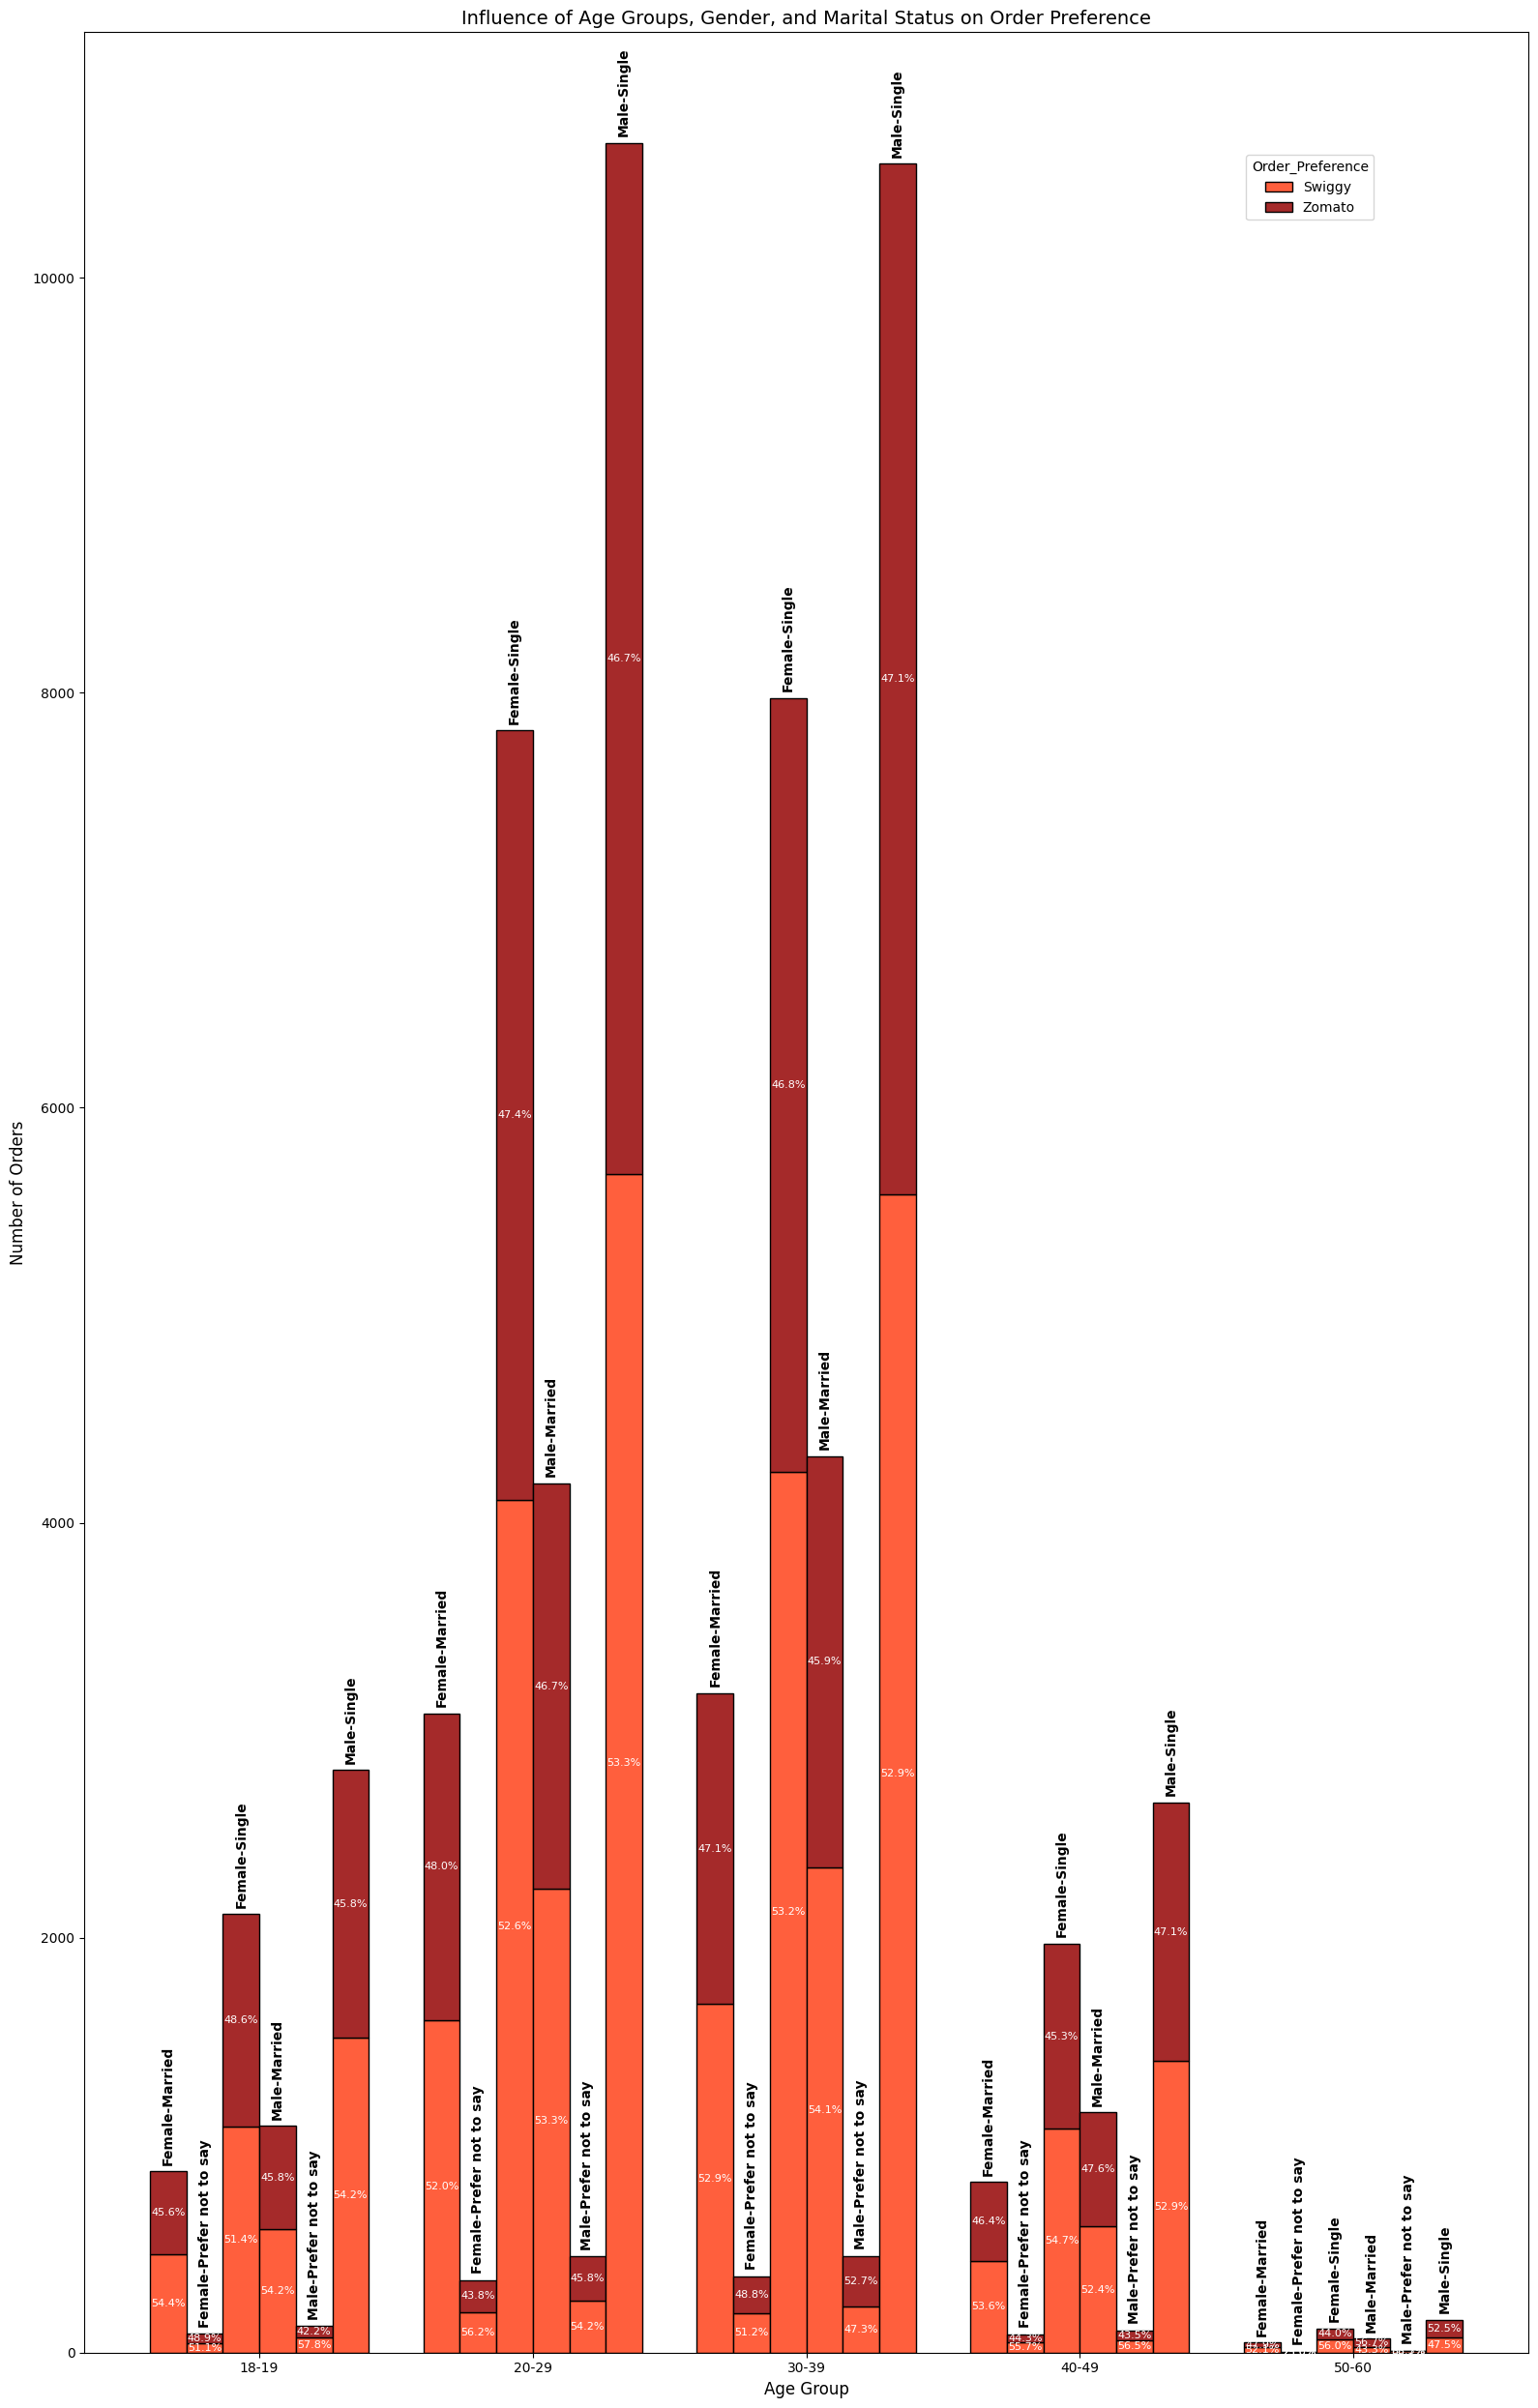

In [4]:
# Define age bins and labels
age_bins = [18, 20, 30, 40, 50, 61]
age_labels = ['18-19', '20-29', '30-39', '40-49', '50-60']

# Bin the age data
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Aggregate data by Age_Group, Gender, Marital_Status, and Order_Preference
grouped_data = data.groupby(['Age_Group', 'Gender', 'Marital_Status', 'Order_Preference']).size().unstack(fill_value=0)

# Calculate percentages within each group
grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Reset index for easier plotting
grouped_percentages = grouped_percentages.reset_index()
grouped_data = grouped_data.reset_index()

# Define a red-orange color palette for the order preferences
colors = sns.color_palette(["#FF5F3D", "#A52A2A"])

# Initialize plot with adjusted layout
fig, ax = plt.subplots(figsize=(16,25))

# Define unique x positions with added space between age groups
group_gap = 2 # Space between groups
x_positions = np.arange(len(grouped_percentages['Age_Group'].unique())) * (1 + group_gap)

# Reset offset for bar positions
bar_width = 0.4  # Width of each bar group
offset = 0

# Iterate through gender and marital status combinations to plot
unique_combinations = grouped_data[['Gender', 'Marital_Status']].drop_duplicates()
for idx, (gender, marital_status) in enumerate(unique_combinations.values):
    subset = grouped_data[(grouped_data['Gender'] == gender) &
                          (grouped_data['Marital_Status'] == marital_status)]
    subset_percentages = grouped_percentages[(grouped_percentages['Gender'] == gender) &
                                             (grouped_percentages['Marital_Status'] == marital_status)]
    for col_idx, order_pref in enumerate(grouped_data.columns[3:]):  # Skip first 3 group columns
        heights = subset[order_pref]
        percentages = subset_percentages[order_pref]
        bars = ax.bar(x_positions + offset, heights, bar_width,
                      bottom=subset[grouped_data.columns[3:]].iloc[:, :col_idx].sum(axis=1), color=colors[col_idx], edgecolor='black')
        # Add percentage text within bars
        for i, (height, pct) in enumerate(zip(heights, percentages)):
            if height > 0:
                ax.text(x_positions[i] + offset, subset[grouped_data.columns[3:]].iloc[i, :col_idx].sum() + height / 2,
                        f'{pct:.1f}%', ha='center', va='center', fontsize=8, color='white')
    # Add legend as vertical text above each bar group
    text_offset = 30 # Space above the bars for the text
    for i, x_pos in enumerate(x_positions):
        ax.text(x_pos + offset, subset[grouped_data.columns[3:]].iloc[i].sum() + text_offset,
                f'{gender}-{marital_status}', ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=90)
    offset += bar_width  # Increment offset for next group

# Add labels and title
ax.set_title('Influence of Age Groups, Gender, and Marital Status on Order Preference', fontsize=14)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.set_xticks(x_positions + (bar_width * (len(unique_combinations) - 1)) / 2)
ax.set_xticklabels(grouped_data['Age_Group'].unique())
labels_legend = ['Swiggy','Zomato']
ax.legend(title="Order_Preference", bbox_to_anchor=(0.8, 0.95), loc='upper left',labels=labels_legend)
plt.tight_layout()
plt.show()

Ques 2: How do customer app preferences (Swiggy vs. Zomato) differ across top 10 cities and when segmented by income groups and age ranges (<25, 25-40, 40-60, 60+)?

<ipython-input-5-03f74ba8f68f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detailed_data['Age_Group'] = pd.cut(detailed_data['Age'], bins=[0, 25, 40, 60], labels=['<25', '25-40', '40-60'])
<ipython-input-5-03f74ba8f68f>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_grouped_data_no_area = filtered_data.groupby(
<ipython-input-5-03f74ba8f68f>:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current 

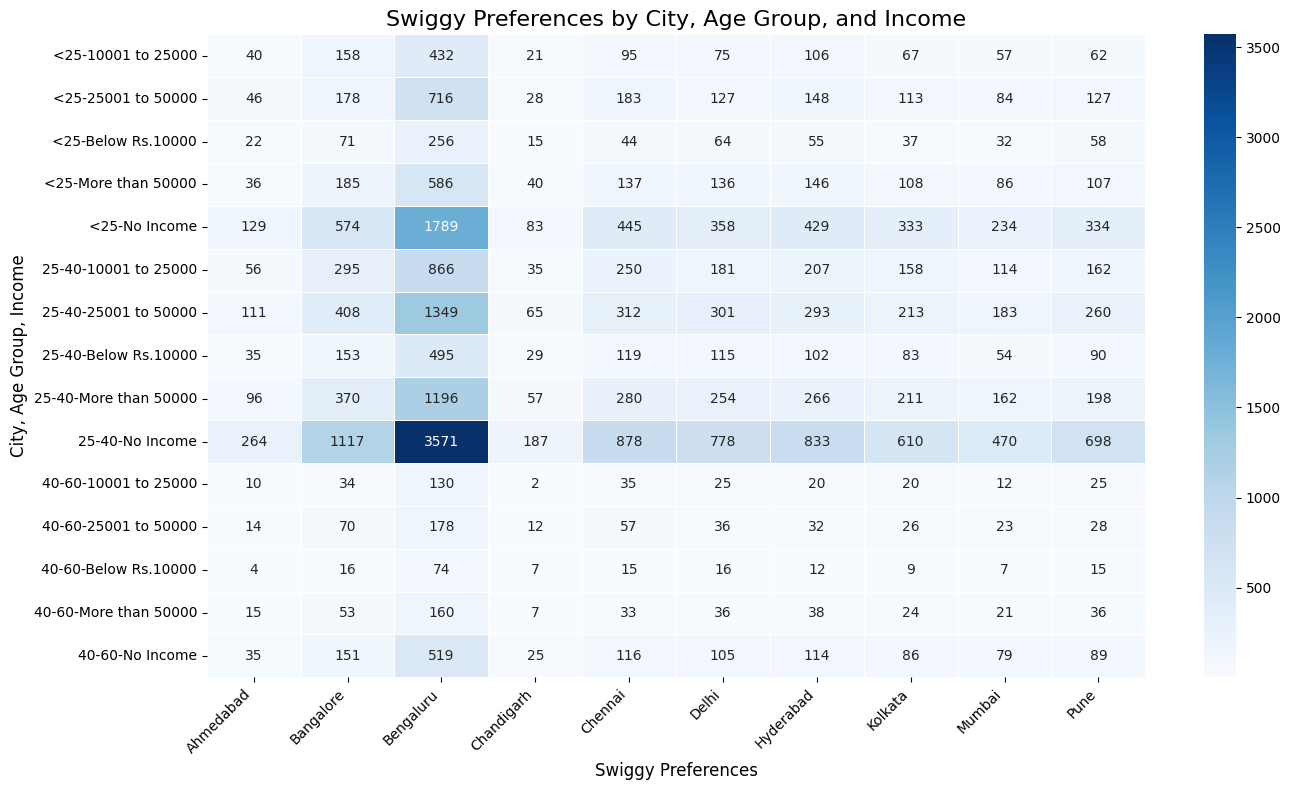

<Figure size 1400x50 with 0 Axes>

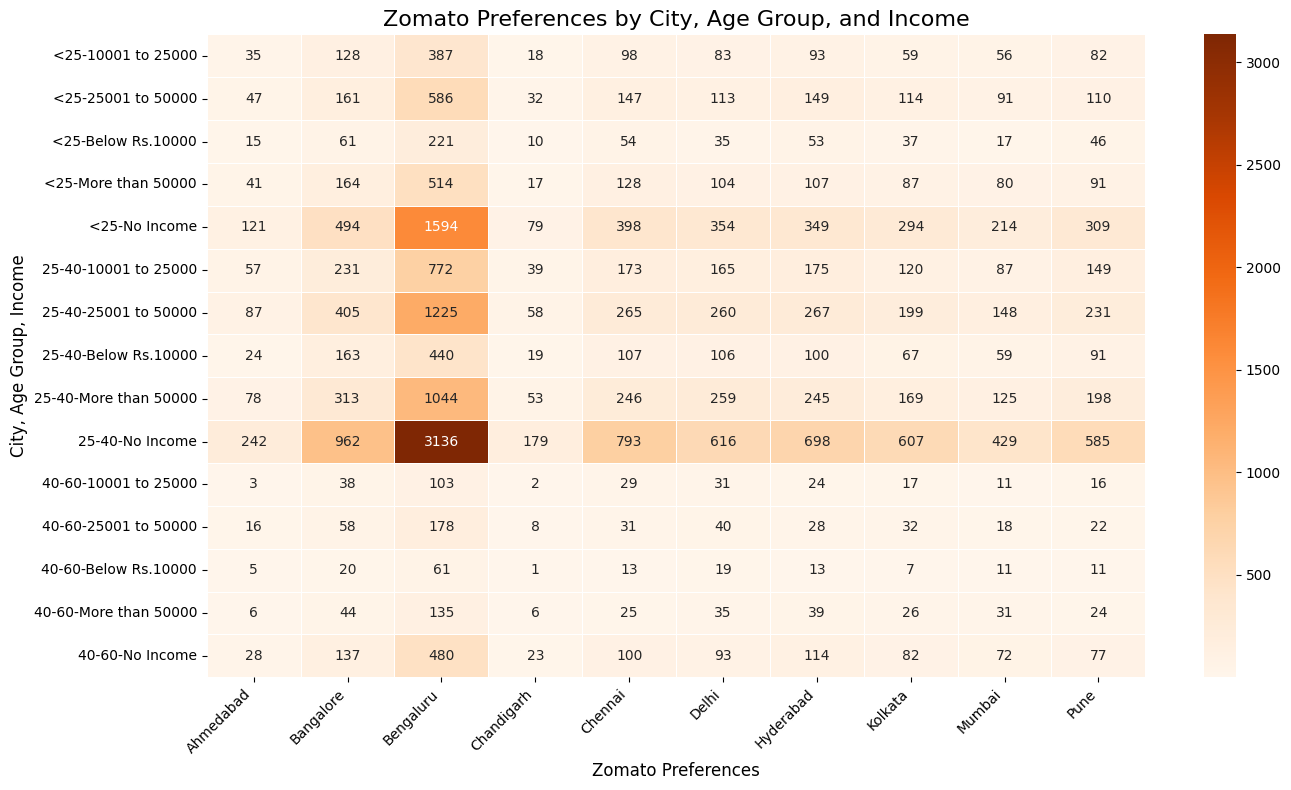

In [5]:
# Filter relevant columns for analysis
detailed_data = data[['City', 'Age', 'Monthly_Income', 'Marital_Status', 'Occupation', 'Order_Preference']]

# Create age group categories
detailed_data['Age_Group'] = pd.cut(detailed_data['Age'], bins=[0, 25, 40, 60], labels=['<25', '25-40', '40-60'])

# Filter data for the top 3 cities and top 2 income groups ("More than 50000", "25001 to 50000")
filtered_data = detailed_data[
    #(detailed_data['Monthly_Income'].isin(['More than 50000', '25001 to 50000'])) &
    (detailed_data['City'].isin(detailed_data['City'].value_counts().head(10).index))
]

# Simplify and aggregate the data without the 'Area' column
filtered_grouped_data_no_area = filtered_data.groupby(
    ['City', 'Age_Group', 'Monthly_Income', 'Order_Preference']
).size().reset_index(name='Count')

# Pivot for visualization
filtered_pivot_no_area = filtered_grouped_data_no_area.pivot_table(
    index=['City', 'Age_Group', 'Monthly_Income'],
    columns='Order_Preference',
    values='Count',
    fill_value=0
)

# Plot Swiggy preferences
plt.figure(figsize=(14, 8))
sns.heatmap(
    filtered_pivot_no_area['Swiggy'].unstack(level=0),
    annot=True, fmt=".0f", cmap="Blues", linewidths=.5, cbar=True
)
plt.title("Swiggy Preferences by City, Age Group, and Income", fontsize=16)
plt.ylabel("City, Age Group, Income", fontsize=12)
plt.xlabel("Swiggy Preferences", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Add a blank figure to create spacing (5 lines worth of space)
plt.figure(figsize=(14, 0.5))  # Height adjusted for space
plt.tight_layout()

# Plot Zomato preferences
plt.figure(figsize=(14, 8))
sns.heatmap(
    filtered_pivot_no_area['Zomato'].unstack(level=0),
    annot=True, fmt=".0f", cmap="Oranges", linewidths=.5, cbar=True
)
plt.title("Zomato Preferences by City, Age Group, and Income", fontsize=16)
plt.ylabel("City, Age Group, Income", fontsize=12)
plt.xlabel("Zomato Preferences", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#2. REVENUE

Ques 1:

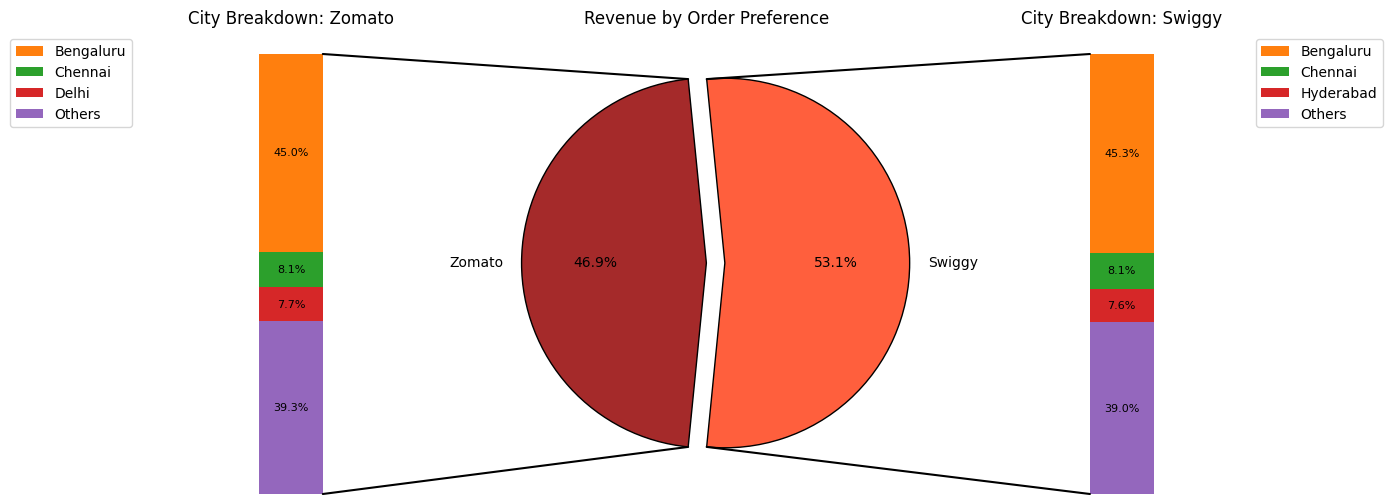

In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# Data preprocessing: Calculate revenue percentages by order preference and city breakdown
data['Total_Order_Value'] = pd.to_numeric(data['Total_Order_Value'], errors='coerce')
filtered_data = data[['City', 'Order_Preference', 'Total_Order_Value']].dropna()

# Standardize city names (combine Bengaluru and Bangalore)
filtered_data['City'] = filtered_data['City'].replace({'Bangalore': 'Bengaluru'})

# Calculate revenue percentages by order preference
order_pref_revenue = filtered_data.groupby('Order_Preference')['Total_Order_Value'].sum()
order_pref_percentage = (order_pref_revenue / order_pref_revenue.sum()) * 100

# Filter data for 'Swiggy' and 'Zomato' and calculate city breakdown
swiggy_data = filtered_data[filtered_data['Order_Preference'] == 'Swiggy']
zomato_data = filtered_data[filtered_data['Order_Preference'] == 'Zomato']

# Group top 5 cities and others for Swiggy
swiggy_city_breakdown = swiggy_data.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
swiggy_city_breakdown_top5 = swiggy_city_breakdown[:3]
swiggy_others = swiggy_city_breakdown[3:].sum()
swiggy_city_breakdown_final = pd.concat([swiggy_city_breakdown_top5, pd.Series(swiggy_others, index=['Others'])])
swiggy_city_breakdown_percentage = (swiggy_city_breakdown_final / swiggy_city_breakdown_final.sum()) * 100

# Group top 5 cities and others for Zomato
zomato_city_breakdown = zomato_data.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
zomato_city_breakdown_top5 = zomato_city_breakdown[:3]
zomato_others = zomato_city_breakdown[3:].sum()
zomato_city_breakdown_final = pd.concat([zomato_city_breakdown_top5, pd.Series(zomato_others, index=['Others'])])
zomato_city_breakdown_percentage = (zomato_city_breakdown_final / zomato_city_breakdown_final.sum()) * 100

# Preparing data for visualization
order_pref_labels = order_pref_percentage.index
pie_sizes = order_pref_percentage.values

# Custom colors for Swiggy and Zomato
colors = ['#FF5F3D' if label == 'Swiggy' else '#A52A2A' if label == 'Zomato' else '#808080'
          for label in order_pref_labels]  # 'Others' color set to grey

# Explode 'Swiggy' slice
explode = [0.1 if label == 'Swiggy' else 0 for label in order_pref_labels]

# Create the figure and axes
fig, (ax_zomato, ax1, ax_swiggy) = plt.subplots(1, 3, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2, 1]})
fig.subplots_adjust(wspace=0.1)

# Plot pie chart
angle = -180 * (order_pref_percentage['Swiggy'] / 100)
wedges, *_ = ax1.pie(
    pie_sizes, labels=order_pref_labels, autopct='%1.1f%%', startangle=angle,
    explode=explode, wedgeprops={"edgecolor": "black"}, colors=colors)
ax1.set_title("Revenue by Order Preference")

# Plot stacked bar chart for 'Swiggy' breakdown by city
bottom_swiggy = 1
width = 0.2
for i, (city, percentage) in enumerate(swiggy_city_breakdown_percentage.items()):
    bottom_swiggy -= percentage / 100
    bc = ax_swiggy.bar(0, percentage / 100, width, bottom=bottom_swiggy, label=city, color=f'C{i+1}')
    ax_swiggy.bar_label(bc, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_swiggy.set_title("City Breakdown: Swiggy")
ax_swiggy.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax_swiggy.axis('off')
ax_swiggy.set_xlim(-2 * width, 2 * width)

# Plot stacked bar chart for 'Zomato' breakdown by city
bottom_zomato = 1
for i, (city, percentage) in enumerate(zomato_city_breakdown_percentage.items()):
    bottom_zomato -= percentage / 100
    bc = ax_zomato.bar(0, percentage / 100, width, bottom=bottom_zomato, label=city, color=f'C{i+1}')
    ax_zomato.bar_label(bc, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_zomato.set_title("City Breakdown: Zomato")
ax_zomato.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))
ax_zomato.axis('off')
ax_zomato.set_xlim(-2 * width, 2 * width)

# Add connection lines for Swiggy (only for Swiggy pie slice)
if 'Swiggy' in order_pref_labels:
    swiggy_wedge = wedges[list(order_pref_labels).index('Swiggy')]
    theta1, theta2 = swiggy_wedge.theta1, swiggy_wedge.theta2
    center, r = swiggy_wedge.center, swiggy_wedge.r

    # Top connection line for Swiggy
    x1 = r * np.cos(np.pi / 180 * theta2) + center[0]
    y1 = r * np.sin(np.pi / 180 * theta2) + center[1]
    con1 = ConnectionPatch(
        xyA=(-width / 2, 1), coordsA=ax_swiggy.transData,
        xyB=(x1, y1), coordsB=ax1.transData,
        color="black", lw=1.5)
    ax_swiggy.add_artist(con1)

    # Bottom connection line for Swiggy
    x2 = r * np.cos(np.pi / 180 * theta1) + center[0]
    y2 = r * np.sin(np.pi / 180 * theta1) + center[1]
    con2 = ConnectionPatch(
        xyA=(-width / 2, bottom_swiggy), coordsA=ax_swiggy.transData,
        xyB=(x2, y2), coordsB=ax1.transData,
        color="black", lw=1.5)
    ax_swiggy.add_artist(con2)

# Add connection lines for Zomato (only for Zomato pie slice)
if 'Zomato' in order_pref_labels:
    zomato_wedge = wedges[list(order_pref_labels).index('Zomato')]
    theta1, theta2 = zomato_wedge.theta1, zomato_wedge.theta2
    center, r = zomato_wedge.center, zomato_wedge.r

    # Top connection line for Zomato (starts from the top of the wedge)
    x1 = r * np.cos(np.pi / 180 * theta1) + center[0]  # Start from the top of the wedge
    y1 = r * np.sin(np.pi / 180 * theta1) + center[1]
    con1 = ConnectionPatch(
        xyA=(width / 2, 1), coordsA=ax_zomato.transData,
        xyB=(x1, y1), coordsB=ax1.transData,
        color="black", lw=1.5)
    ax_zomato.add_artist(con1)

    # Bottom connection line for Zomato (starts from the bottom of the wedge)
    x2 = r * np.cos(np.pi / 180 * theta2) + center[0]  # Start from the bottom of the wedge
    y2 = r * np.sin(np.pi / 180 * theta2) + center[1]
    con2 = ConnectionPatch(
        xyA=(width / 2, bottom_zomato), coordsA=ax_zomato.transData,
        xyB=(x2, y2), coordsB=ax1.transData,
        color="black", lw=1.5)
    ax_zomato.add_artist(con2)

# Show the plot
plt.show()

<ipython-input-62-cd34c7a73db1>:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))


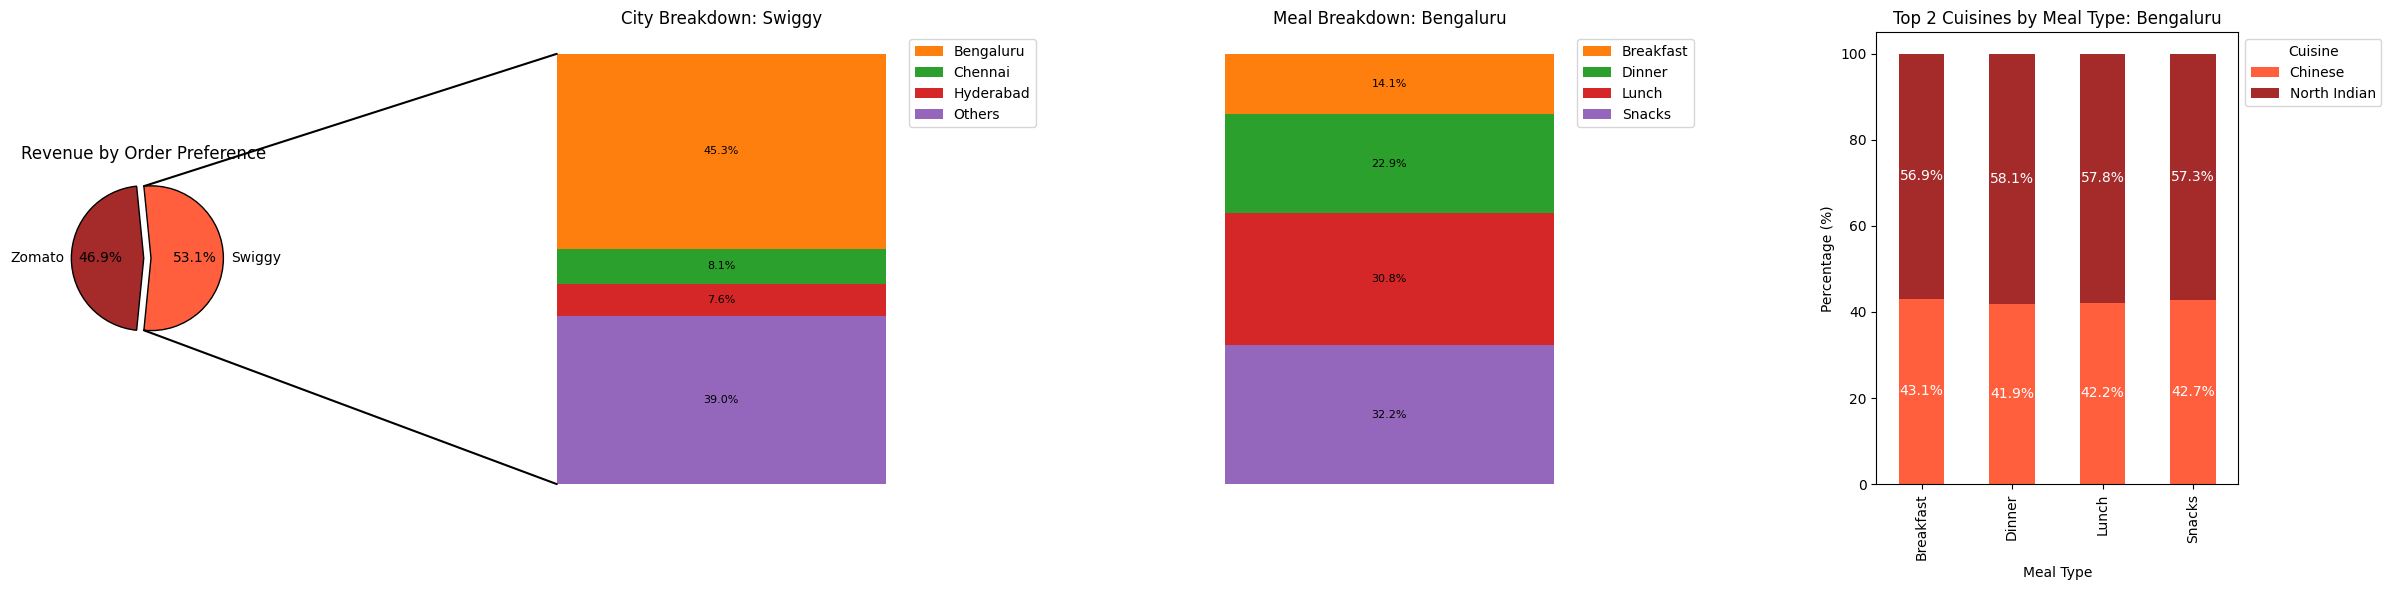

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# Data preprocessing: Calculate revenue percentages by order preference and city breakdown
data['Total_Order_Value'] = pd.to_numeric(data['Total_Order_Value'], errors='coerce')
filtered_data = data[['City', 'Order_Preference', 'Total_Order_Value', 'Meal_Type', 'Cuisine']].dropna()

# Standardize city names (combine Bengaluru and Bangalore)
filtered_data['City'] = filtered_data['City'].replace({'Bangalore': 'Bengaluru'})

# Calculate revenue percentages by order preference
order_pref_revenue = filtered_data.groupby('Order_Preference')['Total_Order_Value'].sum()
order_pref_percentage = (order_pref_revenue / order_pref_revenue.sum()) * 100

# Filter data for 'Swiggy' and calculate city breakdown
swiggy_data = filtered_data[filtered_data['Order_Preference'] == 'Swiggy']
swiggy_city_breakdown = swiggy_data.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
swiggy_city_breakdown_top3 = swiggy_city_breakdown[:3]
swiggy_others = swiggy_city_breakdown[3:].sum()
swiggy_city_breakdown_final = pd.concat([swiggy_city_breakdown_top3, pd.Series(swiggy_others, index=['Others'])])

# Calculate percentage for Swiggy city breakdown
swiggy_city_percentage = (swiggy_city_breakdown_final / swiggy_city_breakdown_final.sum()) * 100

# Identify the most popular city for Swiggy
most_popular_city = swiggy_city_breakdown.idxmax()
most_popular_city_data = swiggy_data[swiggy_data['City'] == most_popular_city]

# Meal type breakdown for the most popular city
meal_type_revenue = most_popular_city_data.groupby('Meal_Type')['Total_Order_Value'].sum()
meal_type_percentage = (meal_type_revenue / meal_type_revenue.sum()) * 100

# Calculate top 2 cuisines for each meal type in the most popular city
filtered_data['Cuisine'] = filtered_data['Cuisine'].fillna('Unknown')  # Replace missing cuisines with 'Unknown'
top_cuisines_by_meal = (
    most_popular_city_data.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value']
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x.sort_values(ascending=False).head(2))
    .reset_index()
)

# Prepare data for visualization
order_pref_labels = order_pref_percentage.index
pie_sizes = order_pref_percentage.values

# Custom colors for Swiggy and Zomato
colors = ['#FF5F3D' if label == 'Swiggy' else '#A52A2A' if label == 'Zomato' else '#808080' for label in order_pref_labels]
explode = [0.1 if label == 'Swiggy' else 0 for label in order_pref_labels]  # Explode Swiggy slice

# Group by Meal_Type and Cuisine, and sum the Total_Order_Value
meal_cuisine_revenue = swiggy_data.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value'].sum().reset_index()

# Get top 2 cuisines for each meal type based on percentage
top_cuisines_by_meal_percentage = (
    meal_cuisine_revenue.groupby('Meal_Type')
    .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
    .reset_index(drop=True)
)

# Pivot the data to make Meal_Type as rows, Cuisine as columns, and Total_Order_Value as values
pivot_data = top_cuisines_by_meal_percentage.pivot_table(
    index='Meal_Type', columns='Cuisine', values='Total_Order_Value', aggfunc='sum', fill_value=0
)

# Calculate the percentage for each cuisine within each meal type
pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Create the figure and axes for a horizontal layout
fig, (ax_pie, ax_swiggy, ax_meal_type, ax_cuisine) = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 2, 2, 2]})
fig.subplots_adjust(wspace=0.4)

# Plot pie chart
angle = -180 * (order_pref_percentage['Swiggy'] / 100)
wedges, *_ = ax_pie.pie(
    pie_sizes, labels=order_pref_labels, autopct='%1.1f%%', startangle=angle,
    explode=explode, wedgeprops={"edgecolor": "black"}, colors=colors)
ax_pie.set_title("Revenue by Order Preference")

# Plot stacked bar chart for Swiggy city breakdown
bottom_swiggy = 1
width = 0.1
for i, (city, percentage) in enumerate(swiggy_city_percentage.items()):
    bottom_swiggy -= percentage / 100
    bar = ax_swiggy.bar(0, percentage / 100, width, bottom=bottom_swiggy, label=city, color=f'C{i+1}')
    ax_swiggy.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_swiggy.set_title("City Breakdown: Swiggy")
ax_swiggy.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax_swiggy.axis('off')

# Add connection lines from Swiggy pie to city breakdown
if 'Swiggy' in order_pref_labels:
    swiggy_wedge = wedges[list(order_pref_labels).index('Swiggy')]
    theta1, theta2 = swiggy_wedge.theta1, swiggy_wedge.theta2
    center, r = swiggy_wedge.center, swiggy_wedge.r

    # Top connection line for Swiggy
    x1 = r * np.cos(np.pi / 180 * theta2) + center[0]
    y1 = r * np.sin(np.pi / 180 * theta2) + center[1]
    con1 = ConnectionPatch(
        xyA=(-width / 2, 1), coordsA=ax_swiggy.transData,
        xyB=(x1, y1), coordsB=ax_pie.transData,
        color="black", lw=1.5)
    ax_swiggy.add_artist(con1)

    # Bottom connection line for Swiggy
    x2 = r * np.cos(np.pi / 180 * theta1) + center[0]
    y2 = r * np.sin(np.pi / 180 * theta1) + center[1]
    con2 = ConnectionPatch(
        xyA=(-width / 2, bottom_swiggy), coordsA=ax_swiggy.transData,
        xyB=(x2, y2), coordsB=ax_pie.transData,
        color="black", lw=1.5)
    ax_swiggy.add_artist(con2)

# Plot stacked bar chart for meal type breakdown with top 2 cuisines
bottom_meal = 1
for i, (meal_type, percentage) in enumerate(meal_type_percentage.items()):
    bottom_meal -= percentage / 100
    bar = ax_meal_type.bar(0, percentage / 100, width, bottom=bottom_meal, label=meal_type, color=f'C{i+1}')
    ax_meal_type.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_meal_type.set_title(f"Meal Breakdown: {most_popular_city}")
ax_meal_type.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax_meal_type.axis('off')

# Plot stacked bar chart for top 2 cuisines by meal type based on percentage
pivot_percentage.plot(kind='bar', stacked=True, ax=ax_cuisine, color=['#FF5F3D', '#A52A2A'])
ax_cuisine.set_title(f"Top 2 Cuisines by Meal Type: {most_popular_city}")
ax_cuisine.set_ylabel('Percentage (%)')
ax_cuisine.set_xlabel('Meal Type')
ax_cuisine.legend(title='Cuisine', loc='upper left', bbox_to_anchor=(1, 1))

# Add percentage labels on the cuisine chart
for p in ax_cuisine.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax_cuisine.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Display the complete plot
plt.tight_layout()
plt.show()


<ipython-input-12-0d21fcacb089>:59: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))


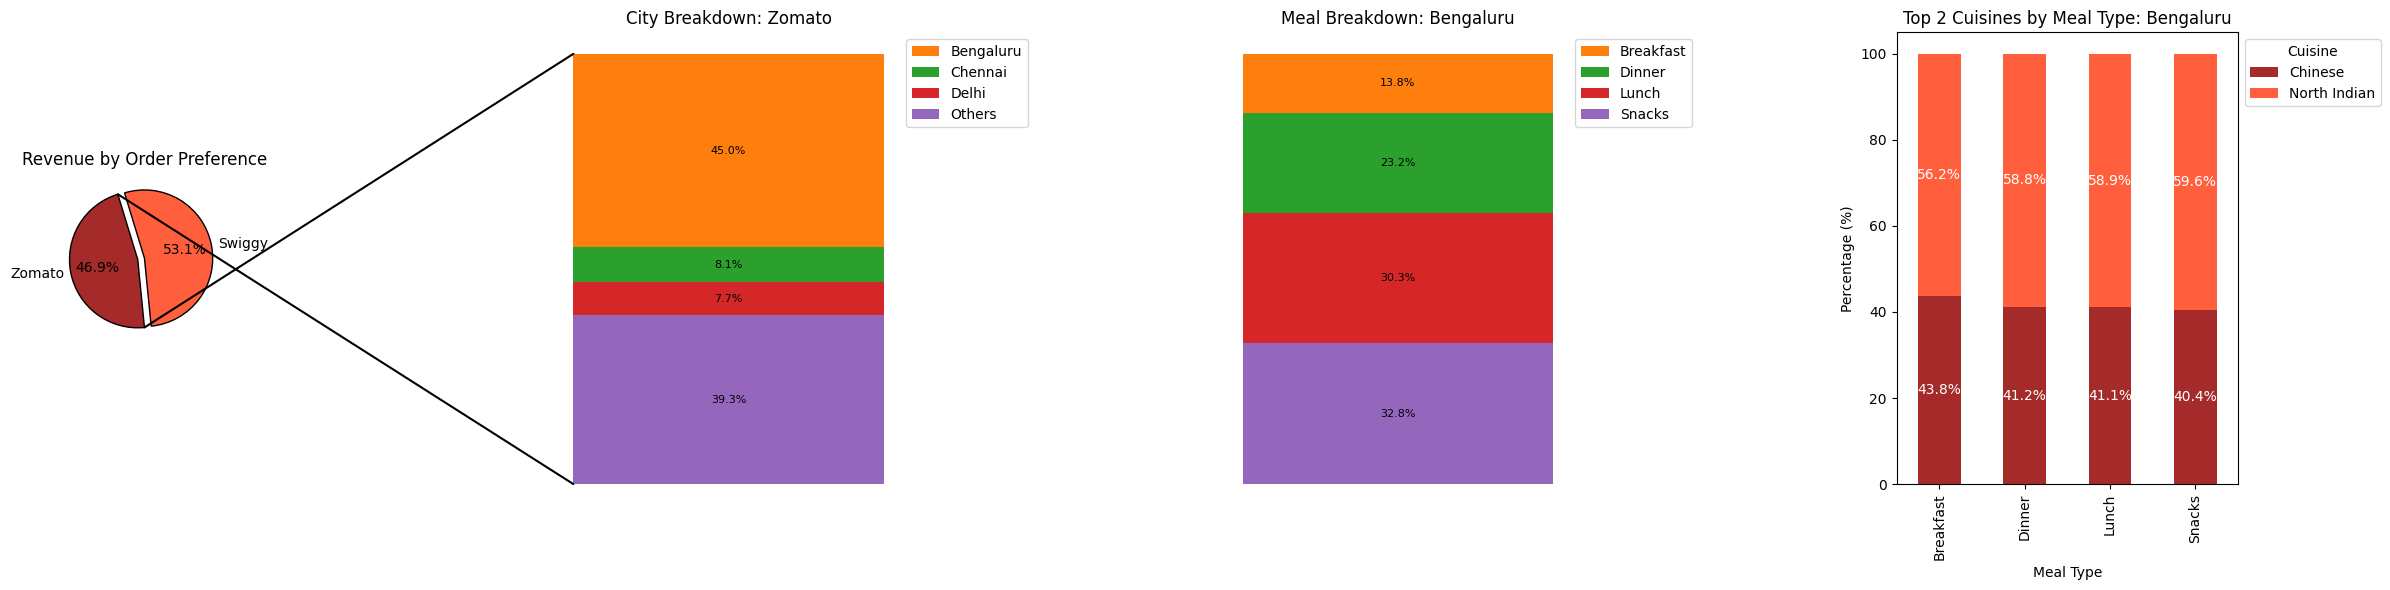

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# Data preprocessing: Calculate revenue percentages by order preference and city breakdown
data['Total_Order_Value'] = pd.to_numeric(data['Total_Order_Value'], errors='coerce')
filtered_data = data[['City', 'Order_Preference', 'Total_Order_Value', 'Meal_Type', 'Cuisine']].dropna()

# Standardize city names (combine Bengaluru and Bangalore)
filtered_data['City'] = filtered_data['City'].replace({'Bangalore': 'Bengaluru'})

# Calculate revenue percentages by order preference
order_pref_revenue = filtered_data.groupby('Order_Preference')['Total_Order_Value'].sum()
order_pref_percentage = (order_pref_revenue / order_pref_revenue.sum()) * 100

# Filter data for 'Zomato' and calculate city breakdown
zomato_data = filtered_data[filtered_data['Order_Preference'] == 'Zomato']
zomato_city_breakdown = zomato_data.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
zomato_city_breakdown_top3 = zomato_city_breakdown[:3]
zomato_others = zomato_city_breakdown[3:].sum()
zomato_city_breakdown_final = pd.concat([zomato_city_breakdown_top3, pd.Series(zomato_others, index=['Others'])])

# Calculate percentage for Zomato city breakdown
zomato_city_percentage = (zomato_city_breakdown_final / zomato_city_breakdown_final.sum()) * 100

# Identify the most popular city for Zomato
most_popular_city_zomato = zomato_city_breakdown.idxmax()
most_popular_city_data_zomato = zomato_data[zomato_data['City'] == most_popular_city_zomato]

# Meal type breakdown for the most popular city
meal_type_revenue_zomato = most_popular_city_data_zomato.groupby('Meal_Type')['Total_Order_Value'].sum()
meal_type_percentage_zomato = (meal_type_revenue_zomato / meal_type_revenue_zomato.sum()) * 100

# Calculate top 2 cuisines for each meal type in the most popular city
filtered_data['Cuisine'] = filtered_data['Cuisine'].fillna('Unknown')  # Replace missing cuisines with 'Unknown'
top_cuisines_by_meal_zomato = (
    most_popular_city_data_zomato.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value']
    .sum()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: x.sort_values(ascending=False).head(2))
    .reset_index()
)

# Prepare data for visualization
order_pref_labels = order_pref_percentage.index
pie_sizes = order_pref_percentage.values

# Custom colors for Zomato and Swiggy
colors = ['#A52A2A' if label == 'Zomato' else '#FF5F3D' if label == 'Swiggy' else '#808080' for label in order_pref_labels]
explode = [0.1 if label == 'Zomato' else 0 for label in order_pref_labels]  # Explode Zomato slice

# Group by Meal_Type and Cuisine, and sum the Total_Order_Value
meal_cuisine_revenue_zomato = zomato_data.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value'].sum().reset_index()

# Get top 2 cuisines for each meal type based on percentage
top_cuisines_by_meal_percentage_zomato = (
    meal_cuisine_revenue_zomato.groupby('Meal_Type')
    .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
    .reset_index(drop=True)
)

# Pivot the data to make Meal_Type as rows, Cuisine as columns, and Total_Order_Value as values
pivot_data_zomato = top_cuisines_by_meal_percentage_zomato.pivot_table(
    index='Meal_Type', columns='Cuisine', values='Total_Order_Value', aggfunc='sum', fill_value=0
)

# Calculate the percentage for each cuisine within each meal type
pivot_percentage_zomato = pivot_data_zomato.div(pivot_data_zomato.sum(axis=1), axis=0) * 100

# Create the figure and axes for a horizontal layout
fig, (ax_pie, ax_zomato, ax_meal_type, ax_cuisine) = plt.subplots(1, 4, figsize=(24, 6), gridspec_kw={'width_ratios': [1, 2, 2, 2]})
fig.subplots_adjust(wspace=0.4)

# Plot pie chart
angle = -180 * (order_pref_percentage['Zomato'] / 100)
wedges, *_ = ax_pie.pie(
    pie_sizes, labels=order_pref_labels, autopct='%1.1f%%', startangle=angle,
    explode=explode, wedgeprops={"edgecolor": "black"}, colors=colors)
ax_pie.set_title("Revenue by Order Preference")

# Plot stacked bar chart for Zomato city breakdown
bottom_zomato = 1
width = 0.2
for i, (city, percentage) in enumerate(zomato_city_percentage.items()):
    bottom_zomato -= percentage / 100
    bar = ax_zomato.bar(0, percentage / 100, width, bottom=bottom_zomato, label=city, color=f'C{i+1}')
    ax_zomato.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_zomato.set_title("City Breakdown: Zomato")
ax_zomato.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax_zomato.axis('off')

# Add connection lines from Zomato pie to city breakdown
if 'Zomato' in order_pref_labels:
    zomato_wedge = wedges[list(order_pref_labels).index('Zomato')]
    theta1, theta2 = zomato_wedge.theta1, zomato_wedge.theta2
    center, r = zomato_wedge.center, zomato_wedge.r

    # Top connection line for Zomato
    x1 = r * np.cos(np.pi / 180 * theta2) + center[0]
    y1 = r * np.sin(np.pi / 180 * theta2) + center[1]
    con1 = ConnectionPatch(
        xyA=(-width / 2, 1), coordsA=ax_zomato.transData,
        xyB=(x1, y1), coordsB=ax_pie.transData,
        color="black", lw=1.5)
    ax_zomato.add_artist(con1)

    # Bottom connection line for Zomato
    x2 = r * np.cos(np.pi / 180 * theta1) + center[0]
    y2 = r * np.sin(np.pi / 180 * theta1) + center[1]
    con2 = ConnectionPatch(
        xyA=(-width / 2, bottom_zomato), coordsA=ax_zomato.transData,
        xyB=(x2, y2), coordsB=ax_pie.transData,
        color="black", lw=1.5)
    ax_zomato.add_artist(con2)

# Plot stacked bar chart for meal type breakdown with top 2 cuisines
bottom_meal_zomato = 1
for i, (meal_type, percentage) in enumerate(meal_type_percentage_zomato.items()):
    bottom_meal_zomato -= percentage / 100
    bar = ax_meal_type.bar(0, percentage / 100, width, bottom=bottom_meal_zomato, label=meal_type, color=f'C{i+1}')
    ax_meal_type.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

ax_meal_type.set_title(f"Meal Breakdown: {most_popular_city_zomato}")
ax_meal_type.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax_meal_type.axis('off')

# Plot stacked bar chart for top 2 cuisines by meal type based on percentage
pivot_percentage_zomato.plot(kind='bar', stacked=True, ax=ax_cuisine, color=['#A52A2A', '#FF5F3D'])
ax_cuisine.set_title(f"Top 2 Cuisines by Meal Type: {most_popular_city_zomato}")
ax_cuisine.set_ylabel('Percentage (%)')
ax_cuisine.set_xlabel('Meal Type')
ax_cuisine.legend(title='Cuisine', loc='upper left', bbox_to_anchor=(1, 1))

# Add percentage labels on the cuisine chart
for p in ax_cuisine.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax_cuisine.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Display the complete plot
plt.tight_layout()
plt.show()

<ipython-input-60-c590584c6162>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
<ipython-input-60-c590584c6162>:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))


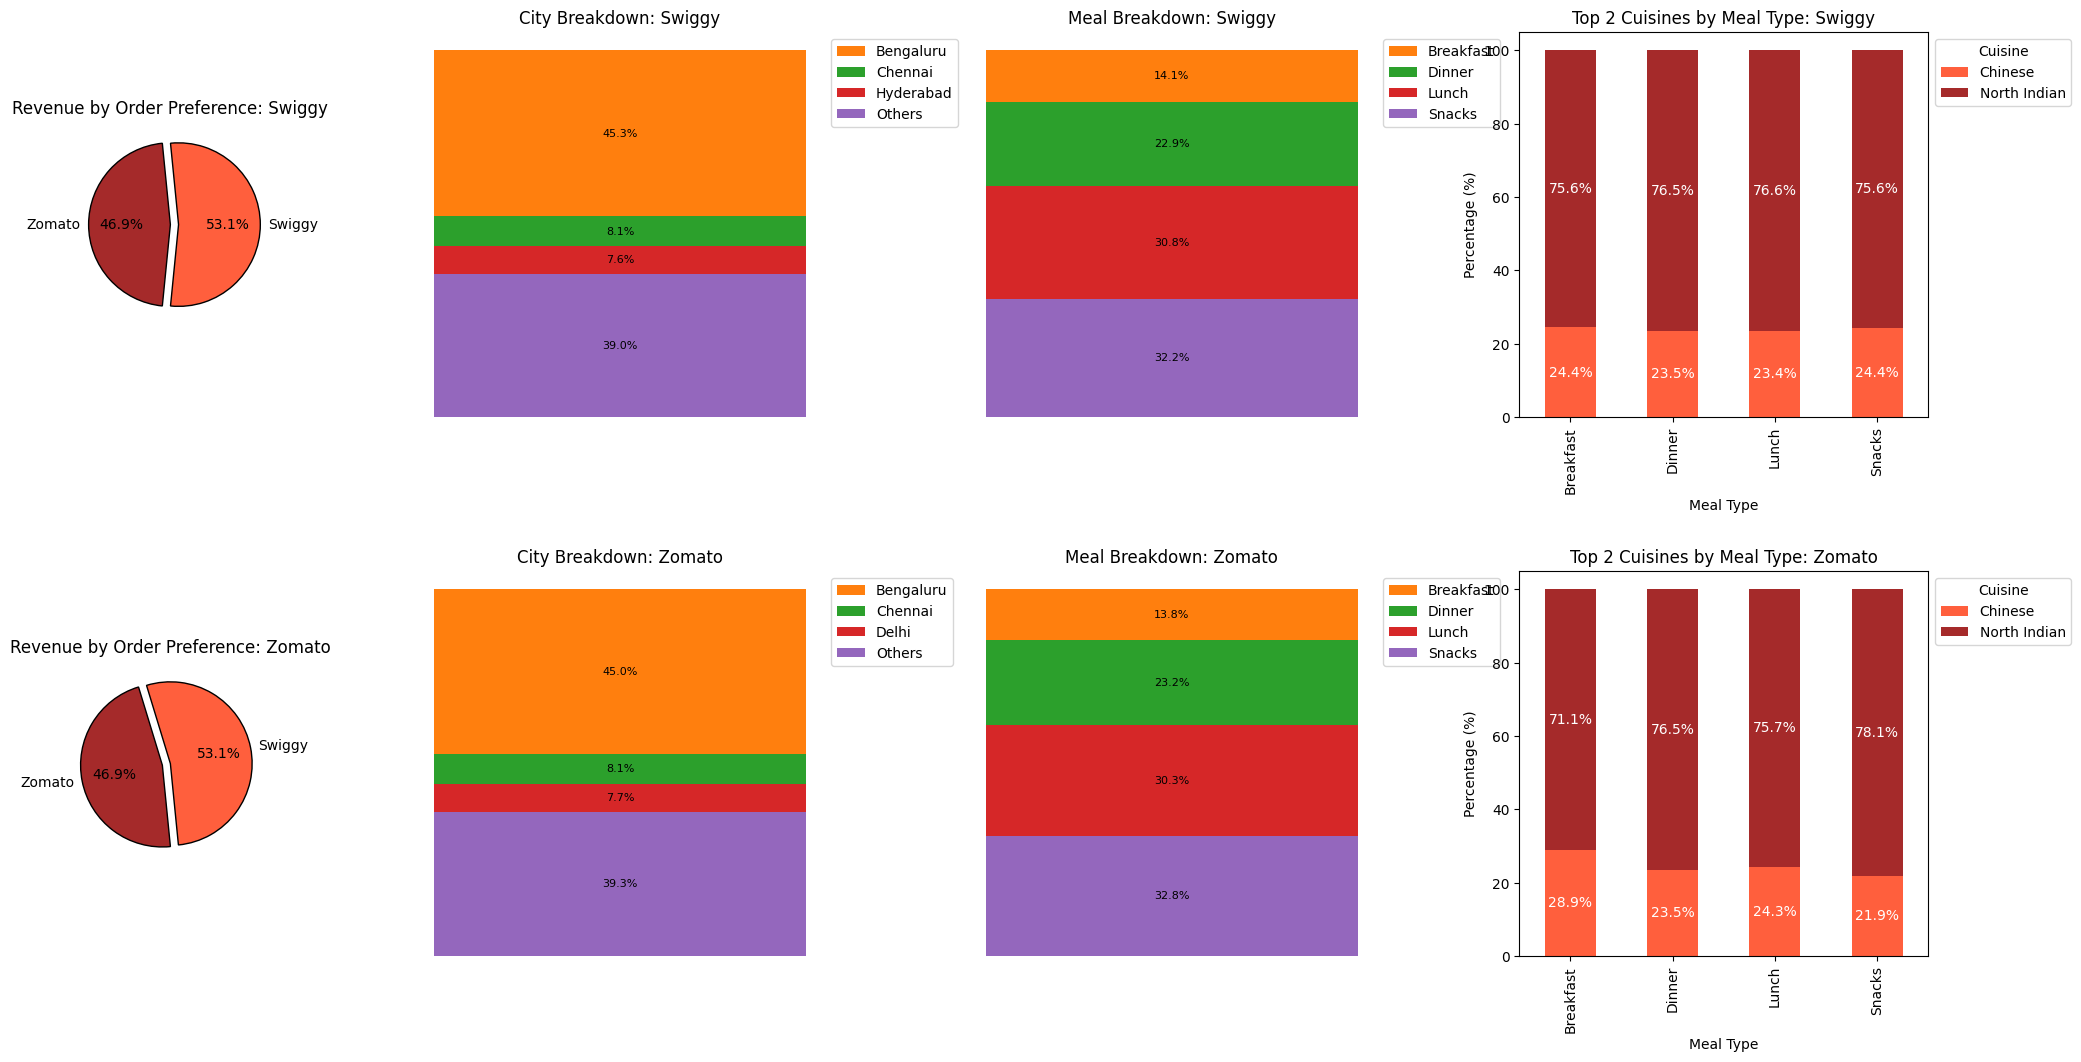

<Figure size 1400x50 with 0 Axes>

<Figure size 1400x50 with 0 Axes>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing: Calculate revenue percentages by order preference and city breakdown
data['Total_Order_Value'] = pd.to_numeric(data['Total_Order_Value'], errors='coerce')
filtered_data = data[['City', 'Order_Preference', 'Total_Order_Value', 'Meal_Type', 'Cuisine']].dropna()

# Standardize city names (combine Bengaluru and Bangalore)
filtered_data['City'] = filtered_data['City'].replace({'Bangalore': 'Bengaluru'})

# Calculate revenue percentages by order preference
order_pref_revenue = filtered_data.groupby('Order_Preference')['Total_Order_Value'].sum()
order_pref_percentage = (order_pref_revenue / order_pref_revenue.sum()) * 100

# Function to process data for a given order preference
def process_order_preference(filtered_data, order_pref, color):
    data_pref = filtered_data[filtered_data['Order_Preference'] == order_pref]
    city_breakdown = data_pref.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
    top3_cities = city_breakdown[:3]
    others = city_breakdown[3:].sum()
    city_breakdown_final = pd.concat([top3_cities, pd.Series(others, index=['Others'])])
    city_percentage = (city_breakdown_final / city_breakdown_final.sum()) * 100

    # Most popular city analysis
    most_popular_city = city_breakdown.idxmax()
    most_popular_city_data = data_pref[data_pref['City'] == most_popular_city]

    # Meal type breakdown
    meal_type_revenue = most_popular_city_data.groupby('Meal_Type')['Total_Order_Value'].sum()
    meal_type_percentage = (meal_type_revenue / meal_type_revenue.sum()) * 100

    # Top 2 cuisines by meal type
    meal_cuisine_revenue = most_popular_city_data.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value'].sum().reset_index()
    top_cuisines_by_meal_percentage = (
        meal_cuisine_revenue.groupby('Meal_Type')
        .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
        .reset_index(drop=True)
    )
    pivot_data = top_cuisines_by_meal_percentage.pivot_table(
        index='Meal_Type', columns='Cuisine', values='Total_Order_Value', aggfunc='sum', fill_value=0
    )
    pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

    return city_percentage, meal_type_percentage, pivot_percentage, color, order_pref

# Process data for Swiggy and Zomato
swiggy_results = process_order_preference(filtered_data, 'Swiggy', '#FF5F3D')
zomato_results = process_order_preference(filtered_data, 'Zomato', '#A52A2A')

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(24, 12), gridspec_kw={'width_ratios': [1, 2, 2, 2]})
fig.subplots_adjust(wspace=0.4, hspace=0.4)

def plot_order_pref(axes_row, results, title):
    city_percentage, meal_type_percentage, pivot_percentage, color, order_pref = results
    ax_pie, ax_city, ax_meal, ax_cuisine = axes_row

    # Pie chart for order preference
    pie_sizes = order_pref_percentage.values
    order_pref_labels = order_pref_percentage.index
    explode = [0.1 if label == order_pref else 0 for label in order_pref_labels]
    colors = ['#FF5F3D' if label == 'Swiggy' else '#A52A2A' for label in order_pref_labels]
    angle = -180 * (order_pref_percentage[order_pref] / 100)

    wedges, *_ = ax_pie.pie(
        pie_sizes, labels=order_pref_labels, autopct='%1.1f%%', startangle=angle,
        explode=explode, wedgeprops={"edgecolor": "black"}, colors=colors)
    ax_pie.set_title(f"Revenue by Order Preference: {order_pref}")

    # Bar chart for city breakdown
    bottom_city = 1
    width = 0.2
    for i, (city, percentage) in enumerate(city_percentage.items()):
        bottom_city -= percentage / 100
        bar = ax_city.bar(0, percentage / 100, width, bottom=bottom_city, label=city, color=f'C{i+1}')
        ax_city.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

    ax_city.set_title(f"City Breakdown: {order_pref}")
    ax_city.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax_city.axis('off')

    # Stacked bar chart for meal type breakdown
    bottom_meal = 1
    for i, (meal_type, percentage) in enumerate(meal_type_percentage.items()):
        bottom_meal -= percentage / 100
        bar = ax_meal.bar(0, percentage / 100, width, bottom=bottom_meal, label=meal_type, color=f'C{i+1}')
        ax_meal.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

    ax_meal.set_title(f"Meal Breakdown: {order_pref}")
    ax_meal.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax_meal.axis('off')

    # Stacked bar chart for top 2 cuisines by meal type
    pivot_percentage.plot(kind='bar', stacked=True, ax=ax_cuisine, color=['#FF5F3D', '#A52A2A'])
    ax_cuisine.set_title(f"Top 2 Cuisines by Meal Type: {order_pref}")
    ax_cuisine.set_ylabel('Percentage (%)')
    ax_cuisine.set_xlabel('Meal Type')
    ax_cuisine.legend(title='Cuisine', loc='upper left', bbox_to_anchor=(1, 1))

    # Add percentage labels on the cuisine chart
    for p in ax_cuisine.patches:
        height = p.get_height()
        if height > 0:  # Only label non-zero patches
            width = p.get_width()
            x = p.get_x() + width / 2
            y = p.get_y() + height / 2
            ax_cuisine.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

    # Add connection lines from Swiggy pie to city breakdown
    if 'Swiggy' in order_pref_labels:
      swiggy_wedge = wedges[list(order_pref_labels).index('Swiggy')]
      theta1, theta2 = swiggy_wedge.theta1, swiggy_wedge.theta2
      center, r = swiggy_wedge.center, swiggy_wedge.r

      # Top connection line for Swiggy
      x1 = r * np.cos(np.pi / 180 * theta2) + center[0]
      y1 = r * np.sin(np.pi / 180 * theta2) + center[1]
      con1 = ConnectionPatch(
          xyA=(-width / 2, 1), coordsA=ax_swiggy.transData,
          xyB=(x1, y1), coordsB=ax_pie.transData,
          color="black", lw=1.5)
      ax_swiggy.add_artist(con1)

      # Bottom connection line for Swiggy
      x2 = r * np.cos(np.pi / 180 * theta1) + center[0]
      y2 = r * np.sin(np.pi / 180 * theta1) + center[1]
      con2 = ConnectionPatch(
          xyA=(-width / 2, bottom_swiggy), coordsA=ax_swiggy.transData,
          xyB=(x2, y2), coordsB=ax_pie.transData,
          color="black", lw=1.5)
      ax_swiggy.add_artist(con2)


# Plot for Swiggy
plot_order_pref(axes[0], swiggy_results, "Swiggy")

# Plot for Zomato
plot_order_pref(axes[1], zomato_results, "Zomato")

# Display the complete plot
plt.tight_layout()
plt.show()


<ipython-input-58-7af1046ace4e>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
<ipython-input-58-7af1046ace4e>:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))


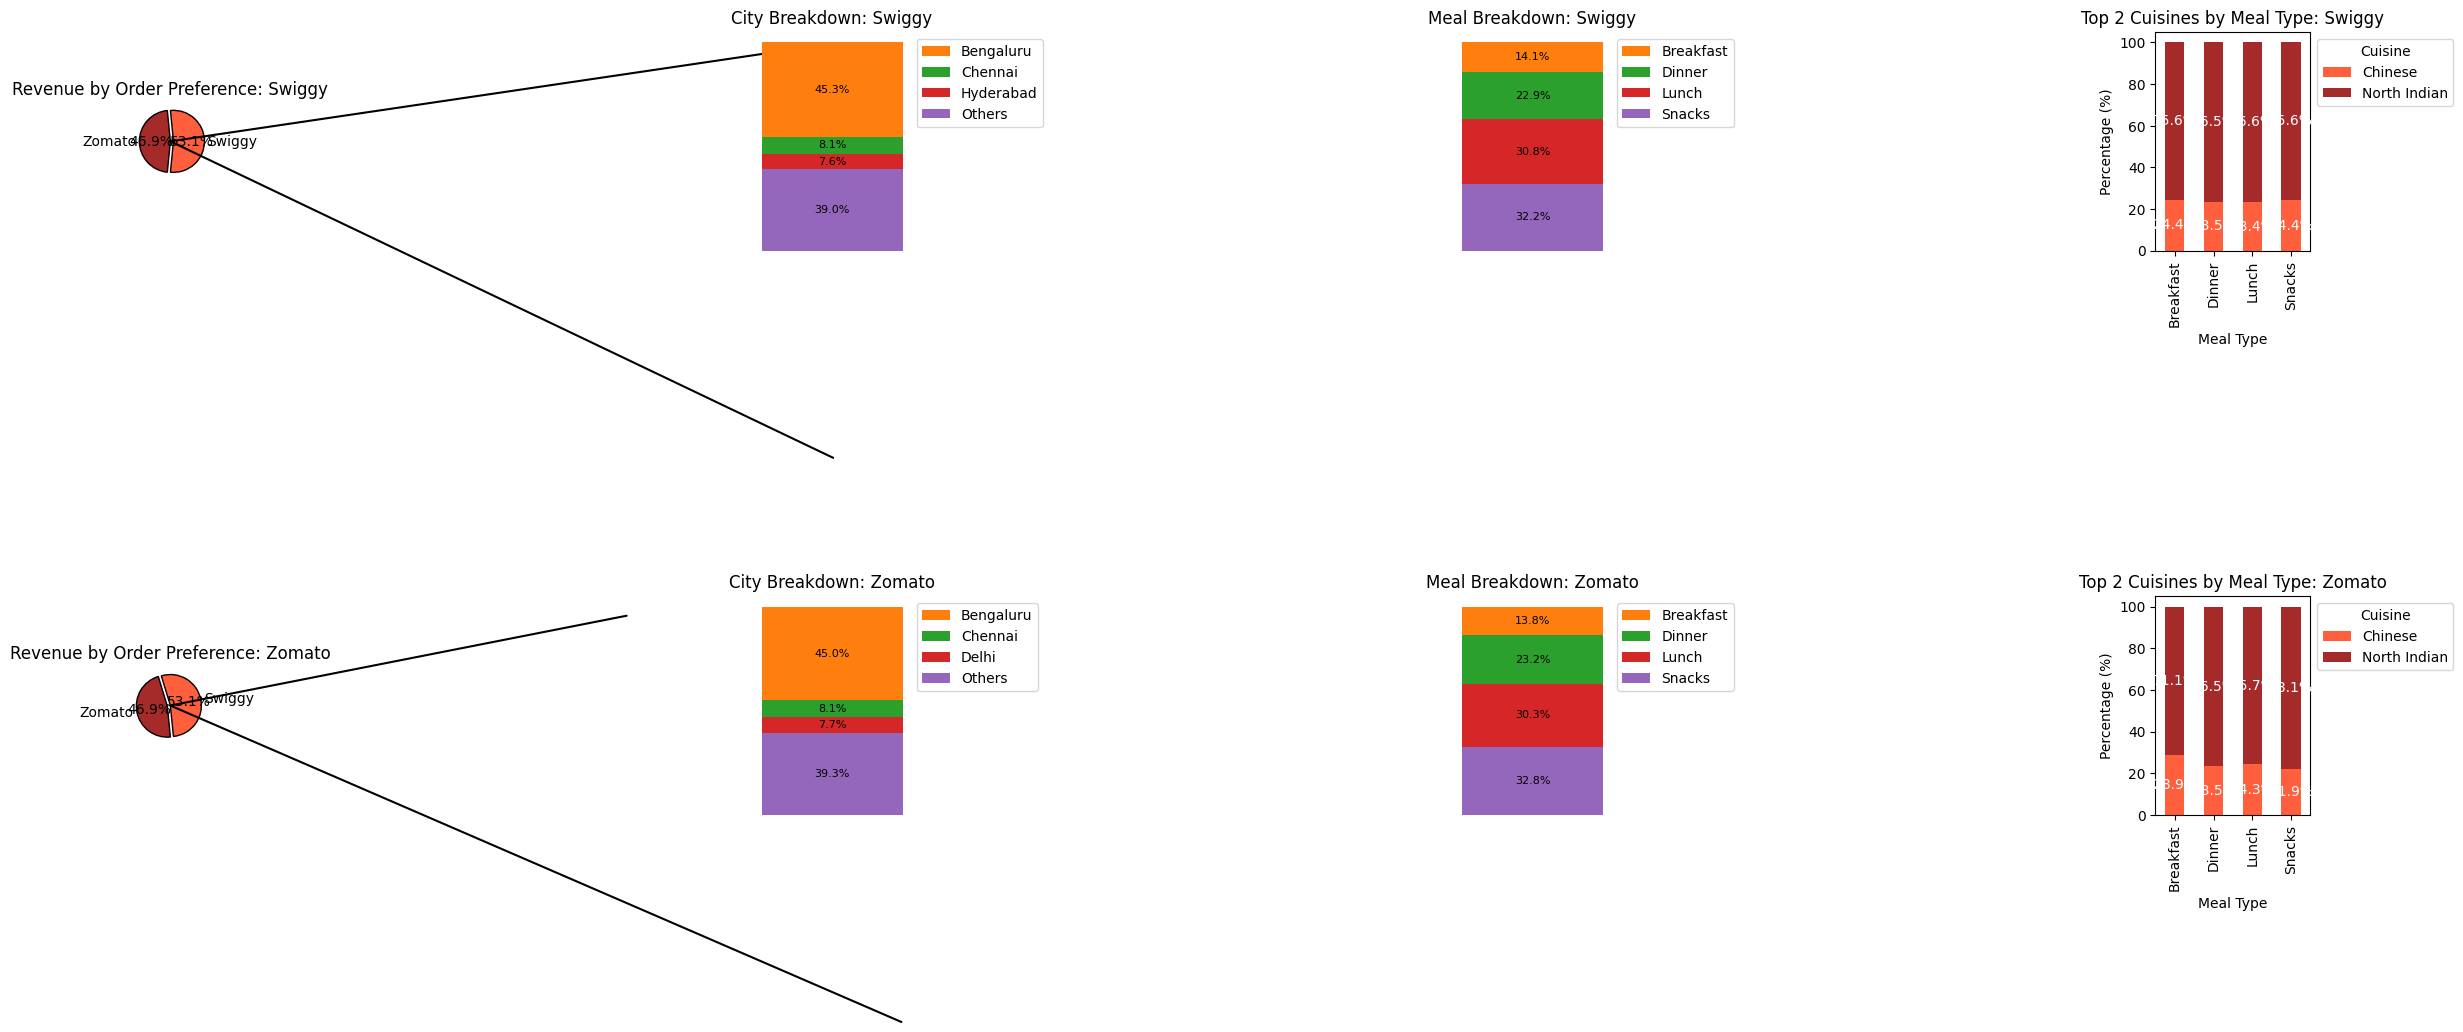

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

# Data preprocessing: Calculate revenue percentages by order preference and city breakdown
data['Total_Order_Value'] = pd.to_numeric(data['Total_Order_Value'], errors='coerce')
filtered_data = data[['City', 'Order_Preference', 'Total_Order_Value', 'Meal_Type', 'Cuisine']].dropna()

# Standardize city names (combine Bengaluru and Bangalore)
filtered_data['City'] = filtered_data['City'].replace({'Bangalore': 'Bengaluru'})

# Calculate revenue percentages by order preference
order_pref_revenue = filtered_data.groupby('Order_Preference')['Total_Order_Value'].sum()
order_pref_percentage = (order_pref_revenue / order_pref_revenue.sum()) * 100

# Function to process data for a given order preference
def process_order_preference(filtered_data, order_pref, color):
    data_pref = filtered_data[filtered_data['Order_Preference'] == order_pref]
    city_breakdown = data_pref.groupby('City')['Total_Order_Value'].sum().sort_values(ascending=False)
    top3_cities = city_breakdown[:3]
    others = city_breakdown[3:].sum()
    city_breakdown_final = pd.concat([top3_cities, pd.Series(others, index=['Others'])])
    city_percentage = (city_breakdown_final / city_breakdown_final.sum()) * 100

    # Most popular city analysis
    most_popular_city = city_breakdown.idxmax()
    most_popular_city_data = data_pref[data_pref['City'] == most_popular_city]

    # Meal type breakdown
    meal_type_revenue = most_popular_city_data.groupby('Meal_Type')['Total_Order_Value'].sum()
    meal_type_percentage = (meal_type_revenue / meal_type_revenue.sum()) * 100

    # Top 2 cuisines by meal type
    meal_cuisine_revenue = most_popular_city_data.groupby(['Meal_Type', 'Cuisine'])['Total_Order_Value'].sum().reset_index()
    top_cuisines_by_meal_percentage = (
        meal_cuisine_revenue.groupby('Meal_Type')
        .apply(lambda x: x.nlargest(2, 'Total_Order_Value'))
        .reset_index(drop=True)
    )
    pivot_data = top_cuisines_by_meal_percentage.pivot_table(
        index='Meal_Type', columns='Cuisine', values='Total_Order_Value', aggfunc='sum', fill_value=0
    )
    pivot_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

    return city_percentage, meal_type_percentage, pivot_percentage, color, order_pref

# Process data for Swiggy and Zomato
swiggy_results = process_order_preference(filtered_data, 'Swiggy', '#FF5F3D')
zomato_results = process_order_preference(filtered_data, 'Zomato', '#A52A2A')

# Visualization
fig, axes = plt.subplots(2, 4, figsize=(24, 12), gridspec_kw={'width_ratios': [1, 2, 2, 2]})
fig.subplots_adjust(wspace=0.4, hspace=0.4)

def plot_order_pref(axes_row, results, title):
    city_percentage, meal_type_percentage, pivot_percentage, color, order_pref = results
    ax_pie, ax_city, ax_meal, ax_cuisine = axes_row

    # Pie chart for order preference
    pie_sizes = order_pref_percentage.values
    order_pref_labels = order_pref_percentage.index
    explode = [0.1 if label == order_pref else 0 for label in order_pref_labels]
    colors = ['#FF5F3D' if label == 'Swiggy' else '#A52A2A' for label in order_pref_labels]
    angle = -180 * (order_pref_percentage[order_pref] / 100)

    wedges, *_ = ax_pie.pie(
        pie_sizes, labels=order_pref_labels, autopct='%1.1f%%', startangle=angle,
        explode=explode, wedgeprops={"edgecolor": "black"}, colors=colors)
    ax_pie.set_title(f"Revenue by Order Preference: {order_pref}")

    # Add connection lines for pie chart slice to city breakdown bar chart
    if 'Swiggy' in order_pref_labels:
        swiggy_wedge = wedges[list(order_pref_labels).index('Swiggy')]
        theta1, theta2 = swiggy_wedge.theta1, swiggy_wedge.theta2
        center, r = swiggy_wedge.center, swiggy_wedge.r

        # Connection lines for Swiggy
        x1 = r * np.cos(np.pi / 180 * theta2) + center[0]
        y1 = r * np.sin(np.pi / 180 * theta2) + center[1]
        con1 = ConnectionPatch(
            xyA=(0, 0), coordsA=ax_pie.transData,
            xyB=(x1, y1), coordsB=ax_city.transData,
            color="black", lw=1.5)
        ax_pie.add_artist(con1)

        x2 = r * np.cos(np.pi / 180 * theta1) + center[0]
        y2 = r * np.sin(np.pi / 180 * theta1) + center[1]
        con2 = ConnectionPatch(
            xyA=(0, 0), coordsA=ax_pie.transData,
            xyB=(x2, y2), coordsB=ax_city.transData,
            color="black", lw=1.5)
        ax_pie.add_artist(con2)

    # Bar chart for city breakdown
    bottom_city = 1
    width = 0.2
    for i, (city, percentage) in enumerate(city_percentage.items()):
        bottom_city -= percentage / 100
        bar = ax_city.bar(0, percentage / 100, width, bottom=bottom_city, label=city, color=f'C{i+1}')
        ax_city.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

    ax_city.set_title(f"City Breakdown: {order_pref}")
    ax_city.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax_city.axis('off')

    # Stacked bar chart for meal type breakdown
    bottom_meal = 1
    for i, (meal_type, percentage) in enumerate(meal_type_percentage.items()):
        bottom_meal -= percentage / 100
        bar = ax_meal.bar(0, percentage / 100, width, bottom=bottom_meal, label=meal_type, color=f'C{i+1}')
        ax_meal.bar_label(bar, labels=[f"{percentage:.1f}%"], label_type='center', fontsize=8)

    ax_meal.set_title(f"Meal Breakdown: {order_pref}")
    ax_meal.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax_meal.axis('off')

    # Stacked bar chart for top 2 cuisines by meal type
    pivot_percentage.plot(kind='bar', stacked=True, ax=ax_cuisine, color=['#FF5F3D', '#A52A2A'])
    ax_cuisine.set_title(f"Top 2 Cuisines by Meal Type: {order_pref}")
    ax_cuisine.set_ylabel('Percentage (%)')
    ax_cuisine.set_xlabel('Meal Type')
    ax_cuisine.legend(title='Cuisine', loc='upper left', bbox_to_anchor=(1, 1))

    # Add percentage labels on the cuisine chart
    for p in ax_cuisine.patches:
        height = p.get_height()
        if height > 0:  # Only label non-zero patches
            width = p.get_width()
            x = p.get_x() + width / 2
            y = p.get_y() + height / 2
            ax_cuisine.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Plot for Swiggy
plot_order_pref(axes[0], swiggy_results, "Swiggy")

# Plot for Zomato
plot_order_pref(axes[1], zomato_results, "Zomato")

# Display the complete plot
plt.tight_layout()
plt.show()